In [ ]:
# Installing shap through Anaconda Prompt / Jupyter Terminal / Command Prompt by typing
# conda install conda-forge::shap
# pip install shap

In [9]:
# Importing necessary packages /  libraries / functions
# For tabular data
import pandas as pd
# For generic maths
import numpy as np
from numpy import absolute
# Modeling
from sklearn.svm import SVR
# Metrics / function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
# Shap
import shap
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# For the reproducibility of codes
seed = 7

In [10]:
# Importing the dataset
mydata = pd.read_csv('E:/SLTechDocs/Data/Lake2.csv')

In [ ]:
# Dataset exploration

In [11]:
mydata.head()

,T,ET,AT,P,SM,LL
0,1/1/1993,0.000015,21.98,7.936,184.207,281.535000
1,2/1/1993,0.000011,24.86,3.472,170.824,281.163333
2,3/1/1993,0.000015,28.36,37.200,163.860,280.925000
3,4/1/1993,0.000026,29.18,181.440,170.926,280.750000
4,5/1/1993,0.000032,29.03,373.860,189.816,280.585000


In [12]:
mydata.describe()

,ET,AT,P,SM,LL
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.000023,26.616167,297.573100,190.321337,281.187268
std,0.000012,2.038722,308.285971,43.431580,0.454969
min,0.000001,21.370000,0.868000,98.574000,280.200000
25%,0.000013,25.197500,16.515000,158.035750,280.832500
50%,0.000023,26.470000,193.500000,182.271000,281.120000
75%,0.000033,28.185000,504.834000,222.011750,281.468750
max,0.000046,31.080000,1086.736000,292.338000,282.276667


In [13]:
mydata.shape

(240, 6)

In [ ]:
# Output and input data preparation

In [15]:
# the output data or target, y
y = mydata['LL']

In [16]:
y.shape

(240,)

In [17]:
y.head()

0    281.535000
1    281.163333
2    280.925000
3    280.750000
4    280.585000
Name: LL, dtype: float64

In [18]:
# Input data or features, X
X = mydata.drop(['T', 'LL'], axis = 1)

In [19]:
X.head()

,ET,AT,P,SM
0,0.000015,21.98,7.936,184.207
1,0.000011,24.86,3.472,170.824
2,0.000015,28.36,37.200,163.860
3,0.000026,29.18,181.440,170.926
4,0.000032,29.03,373.860,189.816


In [20]:
X.shape

(240, 4)

In [ ]:
# Please run the VIF analysis and scale / standardize the features before the next steps

In [21]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30, shuffle = True)

In [22]:
# To check the sizes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(168, 4) (72, 4) (168,) (72,)


In [ ]:
#### Support Vector Regression #######
# Please run the hyperparameter tuning using your own dataset to get the parameter values

In [23]:
# Model instantiation
model = SVR(kernel = 'poly', C = 60, epsilon = 0.001)

In [24]:
# Fitting the model using the training dataset
svr = model.fit(X_train, y_train)

In [28]:
# Training model performance evaluation
y_predtr = svr.predict(X_train)
print('The training r-sq is:', r2_score(y_train, y_predtr))
print('The training MAE is:', mean_absolute_error(y_train, y_predtr))
print('The training MSE is:', mean_squared_error(y_train, y_predtr))

The training r-sq is: 0.31476626185149414
The training MAE is: 0.2752389764640878
The training MSE is: 0.14367181529781736


In [34]:
# Testing model peerformance evaluation
y_predts = svr.predict(X_test)
print('The testing r-sq is:', r2_score(y_test, y_predts))
print('The testing MAE is:', mean_absolute_error(y_test, y_predts))
print('The testing MSE is:', mean_squared_error(y_test, y_predts))

The testing r-sq is: 0.3565286586387951
The testing MAE is: 0.2766558667271476
The testing MSE is: 0.12689622907211615


In [ ]:
# k-fold cross-validation

In [35]:
# On the training model
tr_cv = cross_val_score(svr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [36]:
tr_cv

array([-0.16027961, -0.07148592, -0.14017827, -0.15121147, -0.13090212,
       -0.11206801, -0.28705986, -0.15586034, -0.25994956, -0.11131854])

In [37]:
# The absolute mean score
print('The absolute mean training cv score is:', absolute(np.mean(tr_cv)))

The absolute mean training cv score is: 0.15803136989369357


In [38]:
# On the testing model
ts_cv = cross_val_score(svr, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [39]:
ts_cv

array([-0.06843862, -0.11814652, -0.2155042 , -0.02891525, -0.26231328,
       -0.26096904, -0.08352614, -0.0336343 , -0.07697679, -0.25548463])

In [40]:
# The absolute mean score
print('The absolute mean testing cv score is:', absolute(np.mean(ts_cv)))

The absolute mean testing cv score is: 0.14039087729029576


In [ ]:
########### SHAP ##################

In [41]:
shap.initjs()

In [42]:
# Creating an explainer using the training dataset to calculate shap values
explainer = shap.KernelExplainer(svr.predict, X_train)

Using 168 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [43]:
# Outputting the shap values
shap_valuestr = explainer.shap_values(X_train)

  0%|          | 0/168 [00:00<?, ?it/s]

In [44]:
shap_valuestr

array([[ 0.00000000e+00,  1.92759549e-02,  3.35702893e-01,
         4.09819838e-02],
       [ 0.00000000e+00, -1.06532148e-02, -4.32337755e-01,
         1.99689312e-01],
       [ 0.00000000e+00,  5.57132032e-03,  3.58091568e-01,
        -1.67453901e-01],
       [ 0.00000000e+00, -2.82743458e-02,  1.02337403e-01,
        -1.60464240e-01],
       [ 0.00000000e+00, -3.65251714e-03, -4.13707270e-01,
         2.62636868e-01],
       [ 0.00000000e+00, -2.13402303e-02,  4.44256395e-03,
        -1.50608190e-01],
       [ 0.00000000e+00, -1.40731970e-02, -1.86744249e-01,
         1.51085599e-01],
       [ 0.00000000e+00,  5.10527702e-04,  3.14619677e-01,
        -2.70617731e-01],
       [ 0.00000000e+00,  2.95242954e-02, -3.49880563e-01,
         9.97921805e-02],
       [ 0.00000000e+00, -1.38654860e-02, -1.57290420e-01,
         5.81918385e-02],
       [ 0.00000000e+00, -3.06705596e-02,  1.15542107e-01,
        -2.80457663e-01],
       [ 0.00000000e+00,  3.70125843e-02,  3.63434975e-01,
      

In [ ]:
# some shap plots on the training dataset

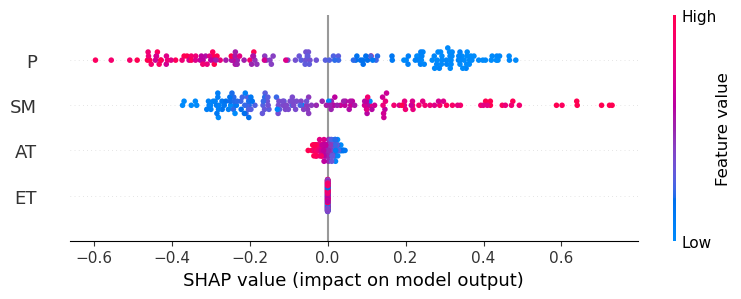

In [45]:
# Summary plot: combination of feature importances and feature effects
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns)

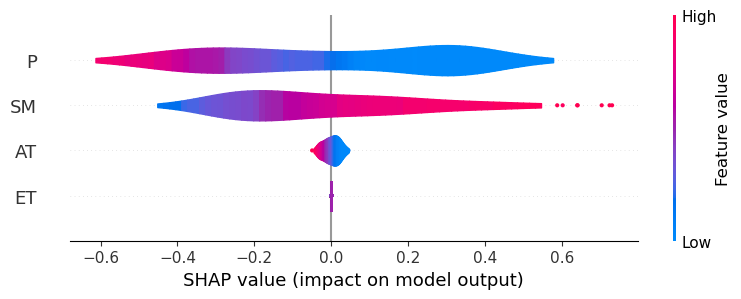

In [46]:
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'violin')

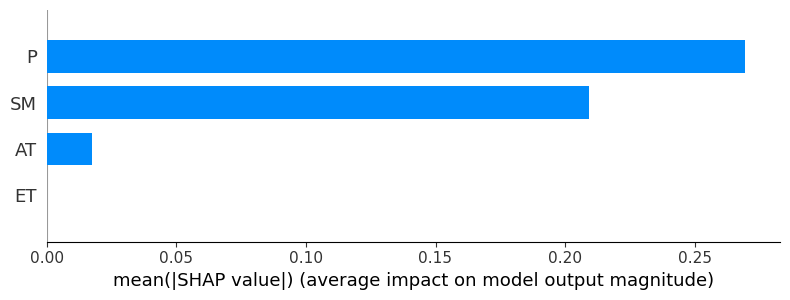

In [48]:
# Feature importance plot
shap.summary_plot(shap_valuestr, X_train, feature_names = X_train.columns, plot_type = 'bar')

  0%|          | 0/168 [00:00<?, ?it/s]

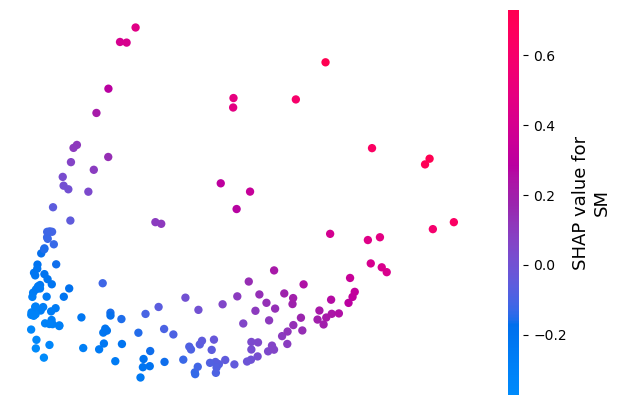

In [50]:
# Embedding plot = projection of shap values to 2D using PCA for visualization
shap.embedding_plot('SM', explainer.shap_values(X_train), feature_names = X_train.columns)


  0%|          | 0/168 [00:00<?, ?it/s]

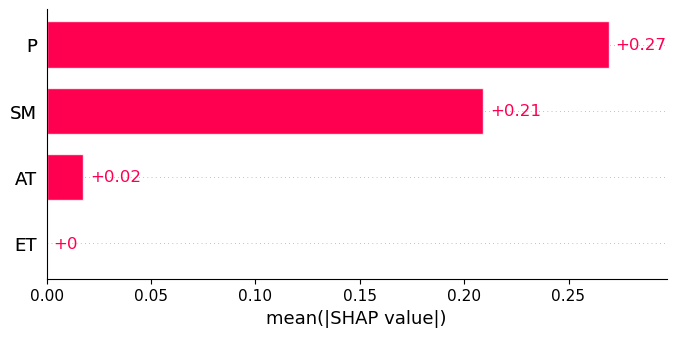

In [53]:
# Global plot
shap_valuestr = explainer(X_train)
shap.plots.bar(shap_valuestr)

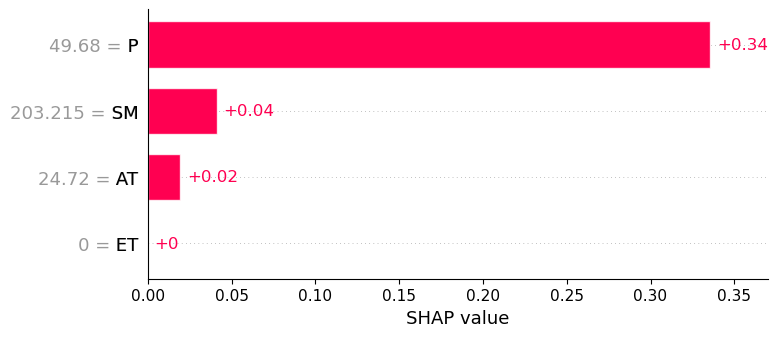

In [54]:
# Local plot
shap.plots.bar(shap_valuestr[0])

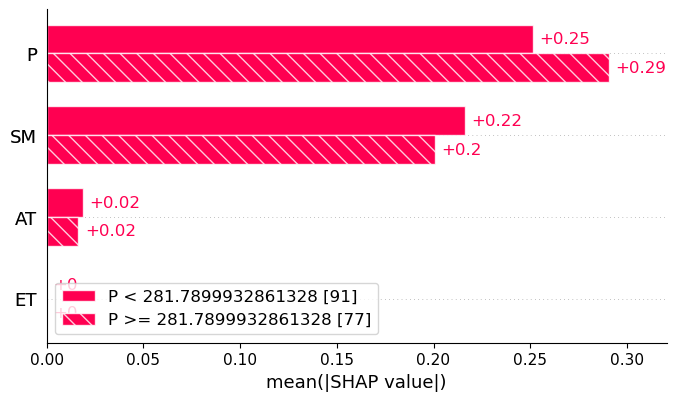

In [55]:
# Auto-cohort plot
shap.plots.bar(shap_valuestr.cohorts(2).abs.mean(0))

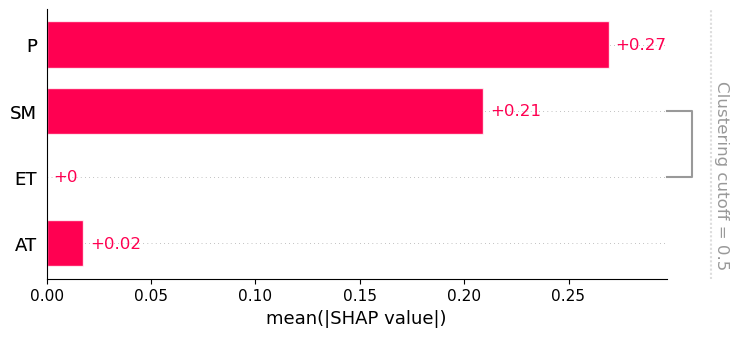

In [57]:
# Feature clusering plot
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_valuestr, clustering = clustering)

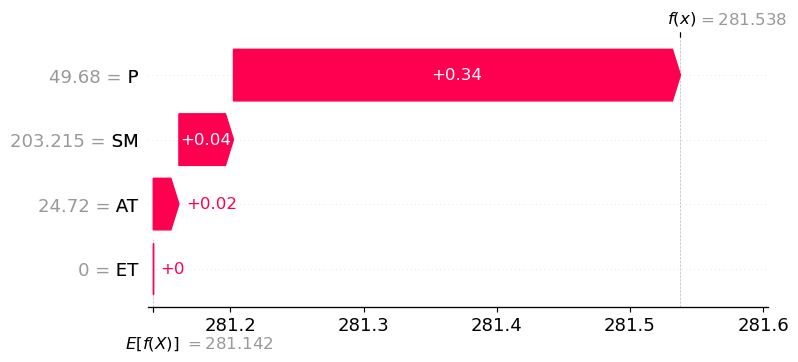

In [58]:
# Waterfall plot
shap.plots.waterfall(shap_valuestr[0])

In [59]:
# Force plot
shap.plots.force(shap_valuestr[0])

In [60]:
### Outputting the shap values on the testing dataset
shap_valuests = explainer(X_test)

  0%|          | 0/72 [00:00<?, ?it/s]

In [61]:
shap_valuests

.values =
array([[ 0.00000000e+00,  1.59131050e-02,  3.50495448e-01,
        -1.26825757e-01],
       [ 0.00000000e+00,  2.66932623e-02, -4.51124736e-01,
         2.86674328e-01],
       [ 0.00000000e+00,  2.98046043e-03,  2.97290589e-01,
        -2.83328057e-01],
       [ 0.00000000e+00, -3.67917605e-02,  1.20974110e-01,
        -2.66357282e-01],
       [ 0.00000000e+00,  2.54452950e-02,  3.75161331e-01,
        -1.01709844e-01],
       [ 0.00000000e+00, -1.04708762e-02,  2.10133299e-01,
        -3.34605091e-01],
       [ 0.00000000e+00,  1.87819321e-03, -1.84966952e-01,
         2.16977515e-01],
       [ 0.00000000e+00,  2.83725915e-03,  2.57654130e-02,
         2.81433839e-01],
       [ 0.00000000e+00, -7.43974246e-03, -2.88821636e-01,
        -1.55920875e-02],
       [ 0.00000000e+00, -2.47891598e-02,  2.52659380e-01,
        -2.60936944e-01],
       [ 0.00000000e+00,  1.55128614e-02, -2.83619246e-01,
         3.09313767e-02],
       [ 0.00000000e+00, -3.89601332e-02,  5.92149929e-

In [ ]:
# The plots

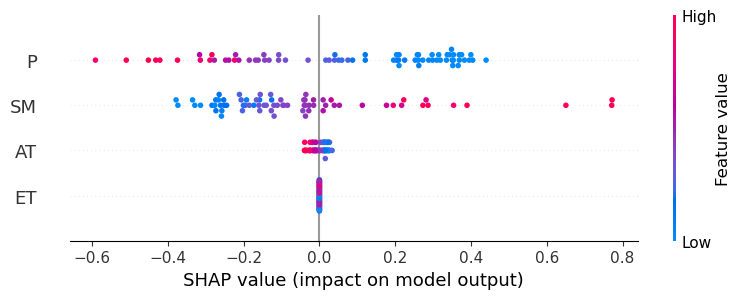

In [62]:
# Summary plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns)

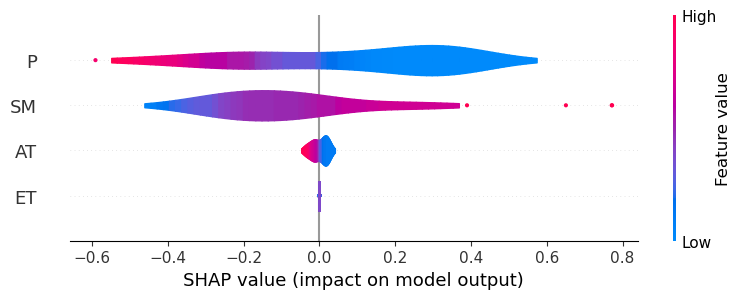

In [63]:
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'violin')

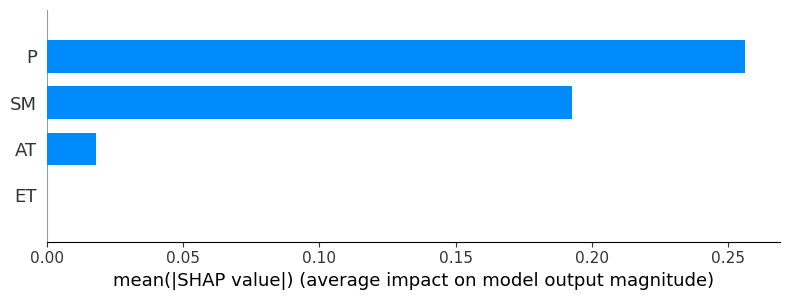

In [64]:
# Feature importance plot
shap.summary_plot(shap_valuests, X_test, feature_names = X_test.columns, plot_type = 'bar')

  0%|          | 0/72 [00:00<?, ?it/s]

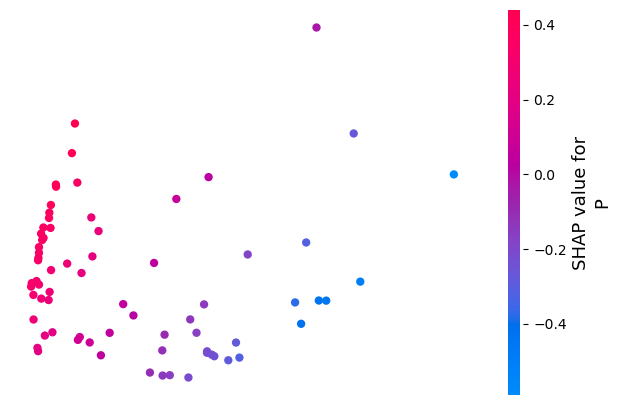

In [65]:
# Embedding plot
shap.embedding_plot('P', explainer.shap_values(X_test), feature_names = X_test.columns)

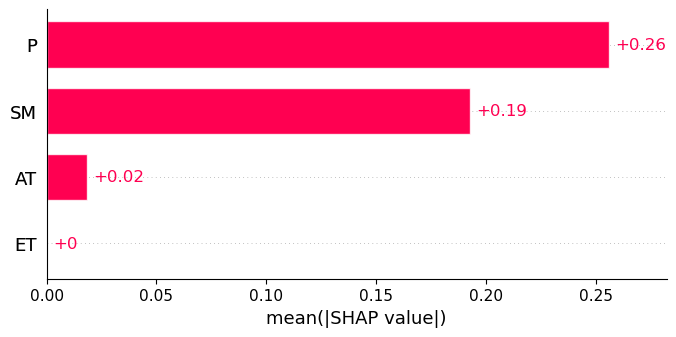

In [66]:
# Global plot
shap.plots.bar(shap_valuests)

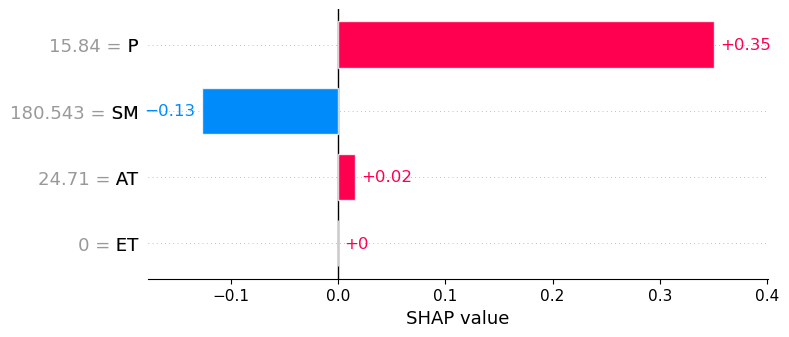

In [67]:
# Local plot
shap.plots.bar(shap_valuests[0])

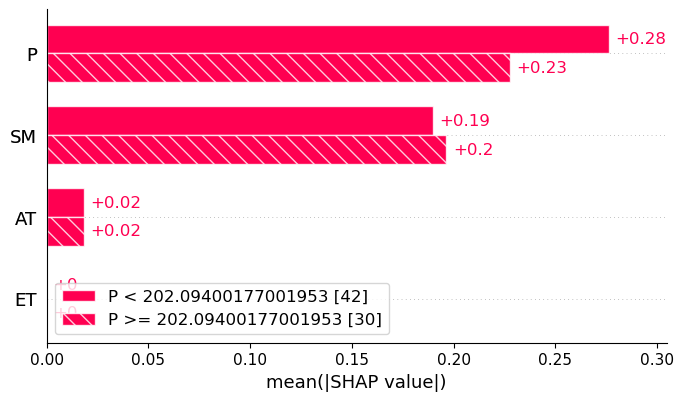

In [68]:
# Auto-cohort plot
shap.plots.bar(shap_valuests.cohorts(2).abs.mean(0))

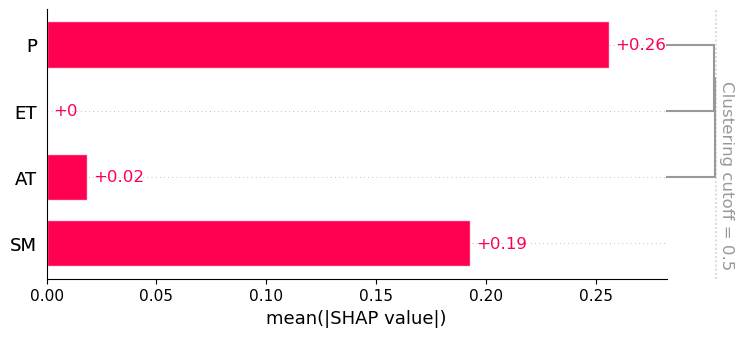

In [69]:
# Feature clustering plot
clustering = shap.utils.hclust(X_test, y_test)
shap.plots.bar(shap_valuests, clustering = clustering)

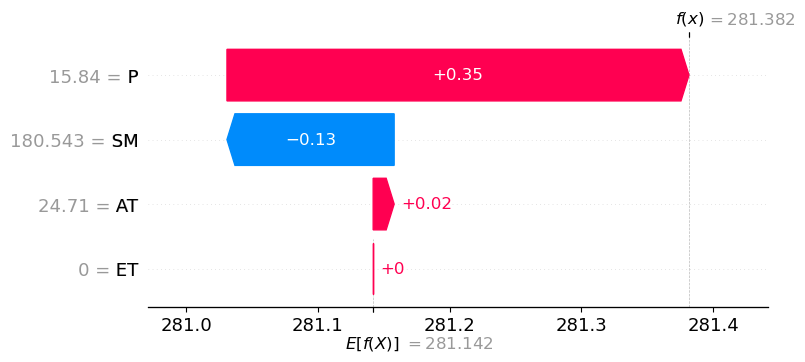

In [70]:
# Waterfall plot
shap.plots.waterfall(shap_valuests[0])

In [71]:
# Force plot
shap.plots.force(shap_valuests[0])